## To find that the member will exit the bank or not

In [44]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [45]:
dataset = pd.read_csv('Churn_Modelling.csv')


In [46]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [47]:
X = dataset.iloc[:, 3:13]

In [48]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [49]:
y = dataset.iloc[:, 13]

In [50]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [51]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [52]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [53]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [54]:
X=pd.concat([X,geography,gender],axis=1)


In [55]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1


In [56]:
X=X.drop(['Geography','Gender'],axis=1)


In [57]:
X


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [60]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [61]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [62]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [63]:
classifier = Sequential()

classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu',input_dim = 11))

classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu'))

classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))

classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)


C:\Users\rigved\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="he_uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\rigved\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="he_uniform")`
  """
C:\Users\rigved\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
  import sys
C:\Users\rigved\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # This is added back by InteractiveShellApp.init_path()


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 1s 211us/step - loss: 0.8029 - accuracy: 0.5503 - val_loss: 0.5324 - val_accuracy: 0.7743
Epoch 2/100
5359/5359 [==============================] - 1s 173us/step - loss: 0.4991 - accuracy: 0.7916 - val_loss: 0.4814 - val_accuracy: 0.7955
Epoch 3/100
5359/5359 [==============================] - 1s 172us/step - loss: 0.4584 - accuracy: 0.7985 - val_loss: 0.4537 - val_accuracy: 0.8035
Epoch 4/100
5359/5359 [==============================] - 1s 161us/step - loss: 0.4311 - accuracy: 0.8078 - val_loss: 0.4361 - val_accuracy: 0.8046
Epoch 5/100
5359/5359 [==============================] - 1s 163us/step - loss: 0.4151 - accuracy: 0.8160 - val_loss: 0.4254 - val_accuracy: 0.8118
Epoch 6/100
5359/5359 [==============================] - 1s 162us/step - loss: 0.4035 - accuracy: 0.8214 - val_loss: 0.4158 - val_accuracy: 0.8160
Epoch 7/100
5359/5359 [==============================] - 1s 163us/step

5359/5359 [==============================] - 1s 219us/step - loss: 0.3400 - accuracy: 0.8600 - val_loss: 0.3725 - val_accuracy: 0.8455
Epoch 57/100
5359/5359 [==============================] - 1s 186us/step - loss: 0.3403 - accuracy: 0.8610 - val_loss: 0.3727 - val_accuracy: 0.8466
Epoch 58/100
5359/5359 [==============================] - 1s 161us/step - loss: 0.3402 - accuracy: 0.8593 - val_loss: 0.3717 - val_accuracy: 0.8466
Epoch 59/100
5359/5359 [==============================] - 1s 179us/step - loss: 0.3398 - accuracy: 0.8584 - val_loss: 0.3712 - val_accuracy: 0.8463
Epoch 60/100
5359/5359 [==============================] - 1s 260us/step - loss: 0.3396 - accuracy: 0.8621 - val_loss: 0.3712 - val_accuracy: 0.8436
Epoch 61/100
5359/5359 [==============================] - 1s 187us/step - loss: 0.3397 - accuracy: 0.8604 - val_loss: 0.3712 - val_accuracy: 0.8451
Epoch 62/100
5359/5359 [==============================] - 1s 161us/step - loss: 0.3394 - accuracy: 0.8612 - val_loss: 0.3719 

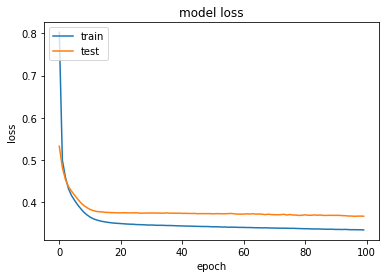

In [64]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


In [65]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [67]:
cm

array([[1525,   70],
       [ 210,  195]], dtype=int64)

In [68]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [42]:
score

0.858